In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [33]:
#Reading data
df = pd.read_csv('clustering/clustering_mall_dataset/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [122]:
X = df.iloc[:, [3, 4]].values

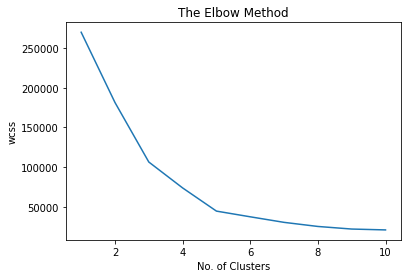

In [123]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

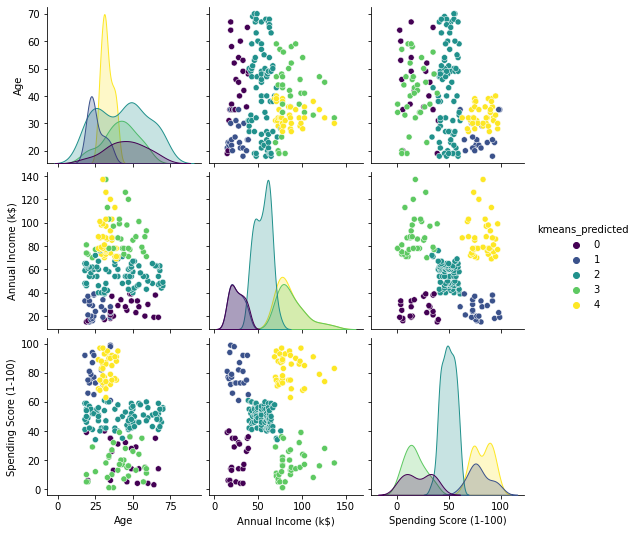

In [43]:
km = KMeans(n_clusters=5)
df["kmeans_predicted"] = km.fit_predict(X)
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = "kmeans_predicted", palette="viridis");

#### Renaming 'kmeans_predicted' values for convenience

In [44]:
df.loc[(df['kmeans_predicted'] == 0), 'kmeans_predicted'] = 'Low income low spenders'
df.loc[(df['kmeans_predicted'] == 1), 'kmeans_predicted'] = 'High income low spenders'
df.loc[(df['kmeans_predicted'] == 2), 'kmeans_predicted'] = 'Medium income medium spenders'
df.loc[(df['kmeans_predicted'] == 3), 'kmeans_predicted'] = 'Low income high spenders'
df.loc[(df['kmeans_predicted'] == 4), 'kmeans_predicted'] = 'High income high spenders'

In [45]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_predicted
0,1,Male,19,15,39,Low income low spenders
1,2,Male,21,15,81,High income low spenders
2,3,Female,20,16,6,Low income low spenders
3,4,Female,23,16,77,High income low spenders
4,5,Female,31,17,40,Low income low spenders
...,...,...,...,...,...,...
195,196,Female,35,120,79,High income high spenders
196,197,Female,45,126,28,Low income high spenders
197,198,Male,32,126,74,High income high spenders
198,199,Male,32,137,18,Low income high spenders


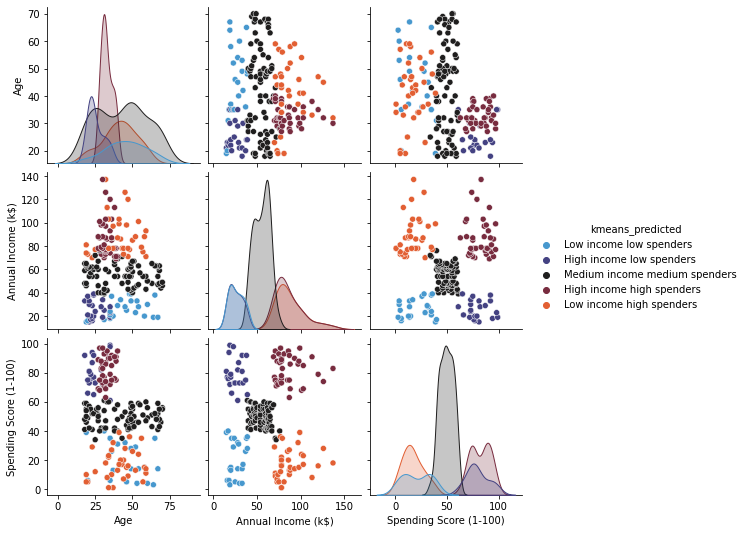

In [47]:
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = "kmeans_predicted", palette="icefire");

In [94]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'kmeans_predicted'],
      dtype='object')

### Applying Linear Regression on 'Low income low spenders'

In [112]:
X = df.loc[df['kmeans_predicted'] == 'Low income low spenders'].drop(
    ['kmeans_predicted', 'Spending Score (1-100)', 'Gender', 'CustomerID'], axis=1).values
y = df.loc[df['kmeans_predicted'] == 'Low income low spenders'].drop(
    ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'kmeans_predicted'], axis=1).values

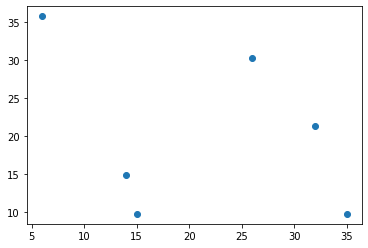

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
plt.scatter(y_test,predict);

In [115]:
#Evaluation
print("MSE: " + str(metrics.mean_squared_error(y_test,predict)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test,predict))))

MSE: 280.2183105785684
RMSE: 16.73972253588955


### Linear Regression on 'High income low spenders'

MSE: 103.94548670982827
RMSE: 10.195365942908978


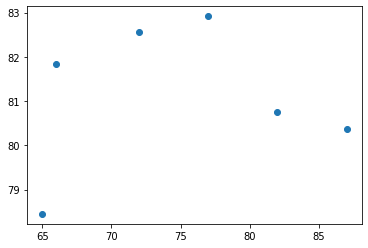

In [116]:
X = df.loc[df['kmeans_predicted'] == 'High income low spenders'].drop(
    ['kmeans_predicted', 'Spending Score (1-100)', 'Gender', 'CustomerID'], axis=1).values
y = df.loc[df['kmeans_predicted'] == 'High income low spenders'].drop(
    ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'kmeans_predicted'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
plt.scatter(y_test,predict);
print("MSE: " + str(metrics.mean_squared_error(y_test,predict)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test,predict))))

### Linear Regression on 'Medium income medium spenders'

MSE: 58.179428315045776
RMSE: 7.627544055267447


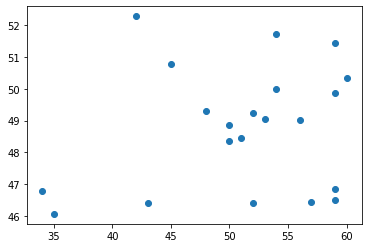

In [118]:
X = df.loc[df['kmeans_predicted'] == 'Medium income medium spenders'].drop(
    ['kmeans_predicted', 'Spending Score (1-100)', 'Gender', 'CustomerID'], axis=1).values
y = df.loc[df['kmeans_predicted'] == 'Medium income medium spenders'].drop(
    ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'kmeans_predicted'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
plt.scatter(y_test,predict);
print("MSE: " + str(metrics.mean_squared_error(y_test,predict)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test,predict))))

### Linear Regression on 'Low income high spenders'

MSE: 177.55359634870015
RMSE: 13.324923877782572


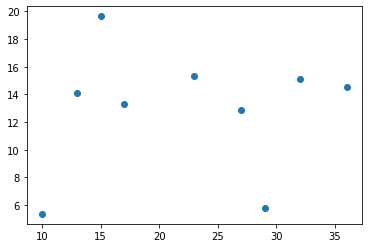

In [119]:
X = df.loc[df['kmeans_predicted'] == 'Low income high spenders'].drop(
    ['kmeans_predicted', 'Spending Score (1-100)', 'Gender', 'CustomerID'], axis=1).values
y = df.loc[df['kmeans_predicted'] == 'Low income high spenders'].drop(
    ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'kmeans_predicted'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
plt.scatter(y_test,predict);
print("MSE: " + str(metrics.mean_squared_error(y_test,predict)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test,predict))))

### Linear Regression on 'High income high spenders'

MSE: 85.43804073610104
RMSE: 9.243270023974256


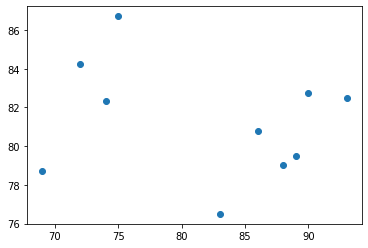

In [120]:
X = df.loc[df['kmeans_predicted'] == 'High income high spenders'].drop(
    ['kmeans_predicted', 'Spending Score (1-100)', 'Gender', 'CustomerID'], axis=1).values
y = df.loc[df['kmeans_predicted'] == 'High income high spenders'].drop(
    ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'kmeans_predicted'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
plt.scatter(y_test,predict);
print("MSE: " + str(metrics.mean_squared_error(y_test,predict)))
print("RMSE: " + str(np.sqrt(metrics.mean_squared_error(y_test,predict))))